#### DSB EDA
- refer from https://www.kaggle.com/gpreda/2019-data-science-bowl-eda

In [6]:
%run ../../utils.ipynb

done


In [7]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline 

import scipy.stats

In [8]:
input_path = '../input/'

specs_df = pd.read_csv(os.path.join(input_path, 'specs.csv'))
train_df = pd.read_csv(os.path.join(input_path, 'train.csv'))
train_labels_df = pd.read_csv(os.path.join(input_path, 'train_labels.csv'))
test_df = pd.read_csv(os.path.join(input_path, 'test.csv'))

specs_df = reduce_mem_usage(specs_df)
train_df = reduce_mem_usage(train_df)
train_labels_df = reduce_mem_usage(train_labels_df)
test_df = reduce_mem_usage(test_df)

Mem. usage decreased to  0.01 Mb (0.0% reduction)
Mem. usage decreased to 778.73 Mb (18.2% reduction)
Mem. usage decreased to  0.49 Mb (48.2% reduction)
Mem. usage decreased to 79.40 Mb (18.2% reduction)


In [9]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    tt = pd.DataFrame(tt.reset_index())
    return (tt.sort_values(['Total']))

def existing_data(data):
    total = data.isnull().count() - data.isnull().sum()
    percent = 100 - (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    tt = pd.DataFrame(tt.reset_index())
    return(tt.sort_values(['Total'], ascending=False))

def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=12)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

In [10]:
pd.set_option('max_colwidth', 150)
sample_train_df = train_df.sample(100000)
sample_train_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
3552285,5d042115,6f91a05df5b8ddf2,2019-09-19T21:29:05.332Z,"{""flowers"":[0,8,8,8,0],""flower"":4,""coordinates"":{""x"":642,""y"":220,""stage_width"":1015,""stage_height"":762},""event_count"":44,""game_time"":42126,""event_...",4de753a1,44,4030,42126,Flower Waterer (Activity),Activity,TREETOPCITY
10366079,f7e47413,cd1ae5cb63ff62d4,2019-08-11T14:50:27.026Z,"{""description"":""Which tub is right for the hog?"",""identifier"":""hog_whichtub"",""media_type"":""animation"",""duration"":2382,""level"":10,""round"":28,""event...",eacd3065,242,3110,352957,Scrub-A-Dub,Game,MAGMAPEAK
6532016,7372e1a5,006da9697a17635a,2019-10-14T16:25:55.257Z,"{""coordinates"":{""x"":619,""y"":441,""stage_width"":1015,""stage_height"":762},""round"":10,""event_count"":244,""game_time"":156264,""event_code"":4070}",914f557d,244,4070,156264,Chow Time,Game,CRYSTALCAVES
8167516,cf7638f3,c278ecee9453ff4c,2019-09-06T23:09:05.980Z,"{""description"":""Well done!"",""identifier"":""RIGHTANSWER2"",""media_type"":""animation"",""duration"":3084,""round"":11,""event_count"":219,""game_time"":286989,""...",b69d5756,219,3121,286989,Pan Balance,Game,CRYSTALCAVES
2587876,beb0a7b9,a23b71c19a2486db,2019-08-12T18:22:19.421Z,"{""description"":""Use your finger and drag the fireworks up into the air."",""identifier"":""Dot_UseFinger"",""media_type"":""audio"",""total_duration"":2790,""...",390c3312,98,3010,129609,Fireworks (Activity),Activity,TREETOPCITY


In [12]:
sample_train_df[sample_train_df.type=='Assessment'].head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
3264432,37ee8496,77b75b542c925a3d,2019-10-13T12:52:23.150Z,"{""bucket"":1,""buckets"":[2,0,0],""coordinates"":{""x"":501,""y"":651,""stage_width"":1015,""stage_height"":762},""buckets_placed"":[3,0,0],""source"":""resources"",...",48a48308,11,4030,19842,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
4797032,155f62a4,30489e97123494ba,2019-09-12T20:06:59.213Z,"{""event_count"":2,""game_time"":389,""event_code"":2020}",6b714198,2,2020,389,Chest Sorter (Assessment),Assessment,CRYSTALCAVES
5414331,3ccd3f02,53bf75182918b619,2019-09-29T03:15:32.323Z,"{""description"":""Use this pan balance to weigh the treasure chests."",""identifier"":""Dot_UsePanBalance"",""media_type"":""audio"",""duration"":2541,""event_c...",77ae184b,13,3110,7771,Chest Sorter (Assessment),Assessment,CRYSTALCAVES
7152188,93b353f2,df067aa18c76cace,2019-09-01T02:57:38.197Z,"{""correct"":false,""pillars"":[3,0,0],""event_count"":22,""game_time"":21655,""event_code"":4100}",9f399a3a,22,4100,21655,Chest Sorter (Assessment),Assessment,CRYSTALCAVES
4071130,7ad3efc6,9f01226b4fcc8c49,2019-09-17T17:59:35.812Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0,""event_code"":2000}",5917d93e,1,2000,0,Cart Balancer (Assessment),Assessment,CRYSTALCAVES


In [20]:
np.unique(test_df.installation_id)

array(['00abaee7', '01242218', '017c5718', '01a44906', '01bc6cb6',
       '02256298', '0267757a', '027e7ce5', '02a29f99', '0300c576',
       '03885368', '03ac279b', '03e33699', '048e7427', '04a7bc3f',
       '04d31500', '0500e23b', '0512bf0e', '0525589b', '05488e26',
       '05771bba', '05b82cf5', '05e17e19', '0617500d', '068ae11f',
       '0754f13b', '07749e99', '08611cc8', '08671ec7', '0889b0ae',
       '090fe325', '0937340d', '09aaaf83', '09aefe80', '0a126293',
       '0a2a77b2', '0a4c0f78', '0af94ba5', '0b24b6ac', '0b607c82',
       '0d5735f2', '0d735146', '0d7752d3', '0dd670e9', '0de6863d',
       '0e514571', '0e718764', '0ea27b66', '0f584054', '0f7116a6',
       '101999d8', '101d16f5', '108044a0', '109ad724', '10acf963',
       '1121f331', '1181ce7c', '11fa34d0', '125a3d09', '12771ee9',
       '1294d68e', '12bcbbce', '13629687', '138a2ecc', '13a0754c',
       '13bcaf23', '13cf3fc0', '13d608cb', '140087ce', '140ea7a3',
       '1423dc8f', '14cdc97f', '153f087c', '1594c19e', '15d869

In [26]:
test_df[test_df.installation_id == '00abaee7'].sort_values('timestamp')[test_df.type=='Assessment']


/Users/s.imazeki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
282,7ad3efc6,8b38fc0d2fd315dc,2019-09-11T18:56:11.918Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0,""event_code"":2000}",00abaee7,1,2000,0,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
283,65a38bf7,8b38fc0d2fd315dc,2019-09-11T18:56:12.019Z,"{""crystals"":[{""id"":""gem07"",""weight"":6},{""id"":""gem05"",""weight"":4},{""id"":""gem01"",""weight"":1},{""id"":""gem03"",""weight"":3},{""id"":""gem02"",""weight"":1},{""i...",00abaee7,2,2020,58,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
284,795e4a37,8b38fc0d2fd315dc,2019-09-11T18:56:12.030Z,"{""description"":""We've got to balance this scale! Fill the trays with gems so both sides weigh the same! Use your finger to drag the gems to the tr...",00abaee7,3,3010,58,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
285,5e109ec3,8b38fc0d2fd315dc,2019-09-11T18:56:15.790Z,"{""crystal_id"":""gem07"",""weight"":6,""coordinates"":{""x"":133,""y"":607,""stage_width"":1015,""stage_height"":762},""source"":""resources"",""crystals"":[{""id"":""gem...",00abaee7,4,4030,3852,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
286,5c2f29ca,8b38fc0d2fd315dc,2019-09-11T18:56:17.869Z,"{""crystal_id"":""gem07"",""weight"":6,""coordinates"":{""x"":164,""y"":260,""stage_width"":1015,""stage_height"":762},""side"":""left"",""left"":[{""id"":""gem07"",""weight...",00abaee7,5,4020,5968,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
287,828e68f9,8b38fc0d2fd315dc,2019-09-11T18:56:19.084Z,"{""description"":""We've got to balance this scale! Fill the trays with gems so both sides weigh the same! Use your finger to drag the gems to the tr...",00abaee7,6,3110,7185,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
288,5e109ec3,8b38fc0d2fd315dc,2019-09-11T18:56:19.155Z,"{""crystal_id"":""gem08"",""weight"":6,""coordinates"":{""x"":615,""y"":608,""stage_width"":1015,""stage_height"":762},""source"":""resources"",""crystals"":[{""id"":""gem...",00abaee7,7,4030,7218,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
289,5c2f29ca,8b38fc0d2fd315dc,2019-09-11T18:56:19.783Z,"{""crystal_id"":""gem08"",""weight"":6,""coordinates"":{""x"":799,""y"":189,""stage_width"":1015,""stage_height"":762},""side"":""right"",""left"":[{""id"":""gem07"",""weigh...",00abaee7,8,4020,7885,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
290,acf5c23f,8b38fc0d2fd315dc,2019-09-11T18:56:23.168Z,"{""coordinates"":{""x"":842,""y"":654,""stage_width"":1015,""stage_height"":762},""event_count"":9,""game_time"":11252,""event_code"":4070}",00abaee7,9,4070,11252,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
291,acf5c23f,8b38fc0d2fd315dc,2019-09-11T18:56:23.184Z,"{""coordinates"":{""x"":267,""y"":609,""stage_width"":1015,""stage_height"":762},""event_count"":10,""game_time"":11252,""event_code"":4070}",00abaee7,10,4070,11252,Cart Balancer (Assessment),Assessment,CRYSTALCAVES


In [24]:
test_df[test_df.type=='Assessment'].groupby('installation_id').count()

,event_id,game_session,timestamp,event_data,event_count,event_code,game_time,title,type,world
installation_id,,,,,,,,,,
00abaee7,27,27,27,27,27,27,27,27,27,27
01242218,245,245,245,245,245,245,245,245,245,245
017c5718,1,1,1,1,1,1,1,1,1,1
01a44906,1,1,1,1,1,1,1,1,1,1
01bc6cb6,1,1,1,1,1,1,1,1,1,1
02256298,16,16,16,16,16,16,16,16,16,16
0267757a,1,1,1,1,1,1,1,1,1,1
027e7ce5,346,346,346,346,346,346,346,346,346,346
02a29f99,201,201,201,201,201,201,201,201,201,201


In [22]:
%%time
extracted_event_data = pd.io.json.json_normalize(sample_train_df.event_data.apply(json.loads))

CPU times: user 7.55 s, sys: 552 ms, total: 8.11 s
Wall time: 8.34 s


In [27]:
missing_data(extracted_event_data)

,index,Total,Percent,Types
44,event_count,0,0.000,int64
43,event_code,0,0.000,int64
49,game_time,1545,1.545,float64
98,round,39661,39.661,float64
23,coordinates.stage_height,48659,48.659,float64
25,coordinates.x,48659,48.659,float64
26,coordinates.y,48659,48.659,float64
24,coordinates.stage_width,48659,48.659,float64
31,description,66015,66.015,object
82,media_type,66617,66.617,object


In [16]:
stat_event_data = existing_data(extracted_event_data)

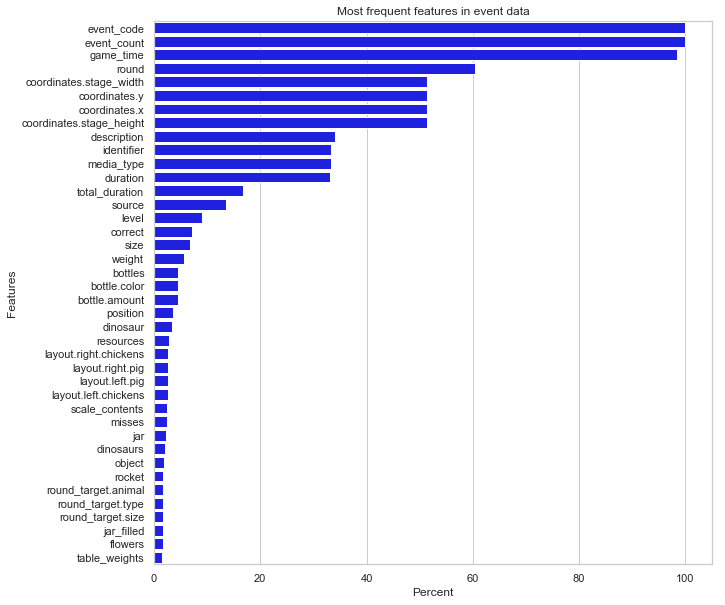

In [18]:
plt.figure(figsize=(10, 10))
sns.set(style='whitegrid')
ax = sns.barplot(x='Percent', y='index', data=stat_event_data.head(40), color='blue')
plt.title('Most frequent features in event data')
plt.ylabel('Features')
plt.show()

In [32]:
specs_args_extracted = pd.DataFrame()
for i in range(0, specs_df.shape[0]): 
    for arg_item in json.loads(specs_df.args[i]) :
        new_df = pd.DataFrame({'event_id': specs_df['event_id'][i],\
                               'info':specs_df['info'][i],\
                               'args_name': arg_item['name'],\
                               'args_type': arg_item['type'],\
                               'args_info': arg_item['info']}, index=[i])
        specs_args_extracted = specs_args_extracted.append(new_df)

In [33]:
specs_args_extracted.head()

,event_id,info,args_name,args_type,args_info
0,2b9272f4,The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct roun...,game_time,int,millisecond count since start of game
0,2b9272f4,The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct roun...,round,int,number of the current round when the event takes place or 0 if no round
0,2b9272f4,The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct roun...,level,int,number of the current level when the event takes place or 0 if no level
0,2b9272f4,The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct roun...,description,string,the text or description of the instruction
0,2b9272f4,The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct roun...,identifier,string,a unique identifier for this piece of instruction


/Users/s.imazeki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


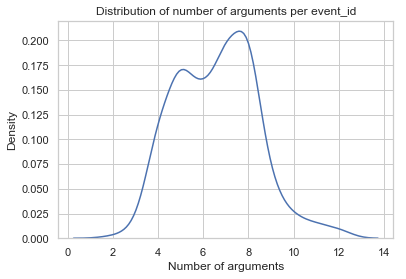

In [34]:
tmp = specs_args_extracted.groupby(['event_id'])['info'].count()
df = pd.DataFrame({'event_id':tmp.index, 'count': tmp.values})
plt.figure(figsize=(6,4))
sns.set(style='whitegrid')
ax = sns.distplot(df['count'],kde=True,hist=False, bins=40)
plt.title('Distribution of number of arguments per event_id')
plt.xlabel('Number of arguments'); plt.ylabel('Density'); plt.show()

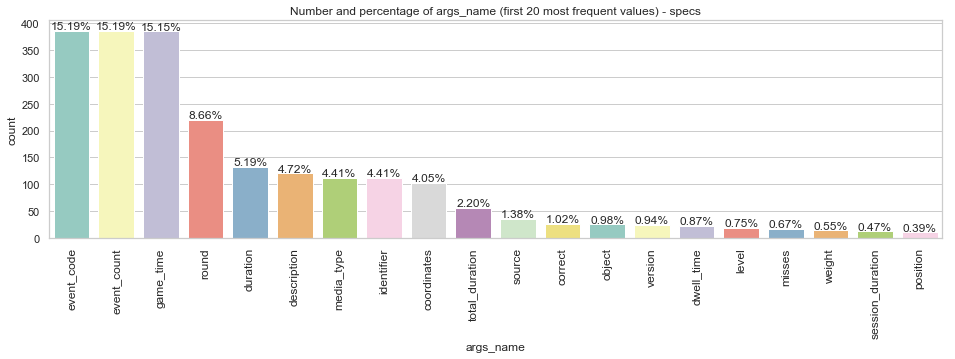

In [43]:
plot_count('args_name', 'args_name (first 20 most frequent values) - specs', specs_args_extracted, size=4)

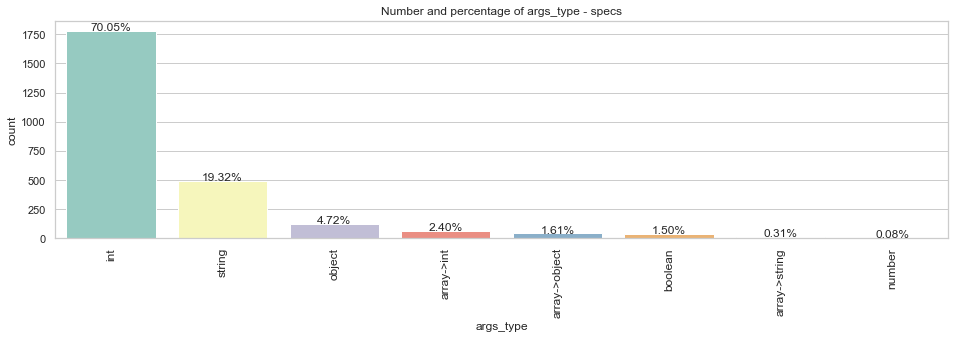

In [44]:
plot_count('args_type', 'args_type - specs', specs_args_extracted, size=4)

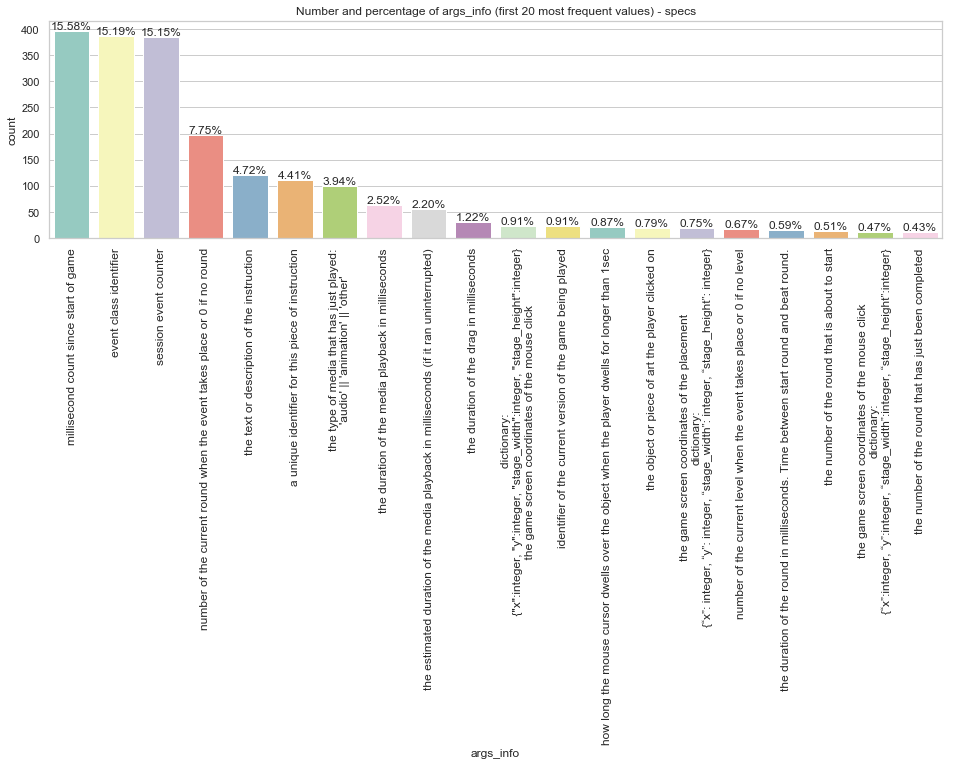

In [45]:
plot_count('args_info', 'args_info (first 20 most frequent values) - specs', specs_args_extracted, size=4)

In [46]:
def extract_time_features(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date'] = df['timestamp'].dt.date
    df['month'] = df['timestamp'].dt.month
    df['hour'] = df['timestamp'].dt.hour
    df['year'] = df['timestamp'].dt.year
    df['dayofweek'] = df['timestamp'].dt.dayofweek
    df['weekofyear'] = df['timestamp'].dt.weekofyear
    df['dayofyear'] = df['timestamp'].dt.dayofyear
    df['quarter'] = df['timestamp'].dt.quarter
    df['is_month_start'] = df['timestamp'].dt.is_month_start
    return df

In [47]:
train_df = extract_time_features(train_df)
train_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,month,hour,year,dayofweek,weekofyear,dayofyear,quarter,is_month_start
0,27253bdc,45bb1e1b6b50c07b,2019-09-06 17:53:46.937000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,2019-09-06,9,17,2019,4,36,249,3,False
1,27253bdc,17eeb7f223665f53,2019-09-06 17:54:17.519000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False
2,77261ab5,0848ef14a8dc6892,2019-09-06 17:54:56.302000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0,""event_code"":2000}",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False
3,b2dba42b,0848ef14a8dc6892,2019-09-06 17:54:56.387000+00:00,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""id...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06 17:55:03.253000+00:00,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""id...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False


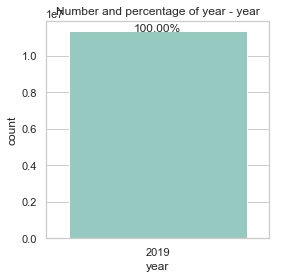

In [48]:
plot_count('year', 'year - year', train_df, size=1)

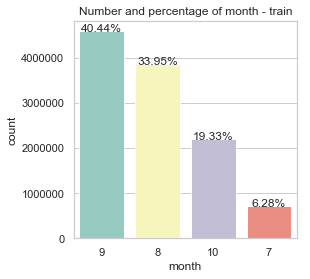

In [49]:
plot_count('month', 'month - train', train_df, size=1)

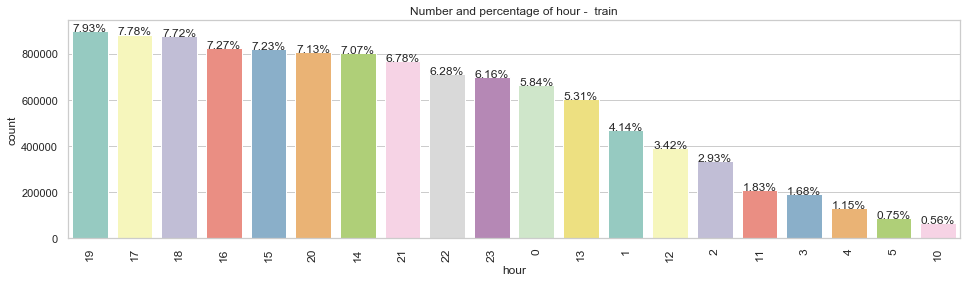

In [50]:
plot_count('hour', 'hour -  train', train_df, size=4)

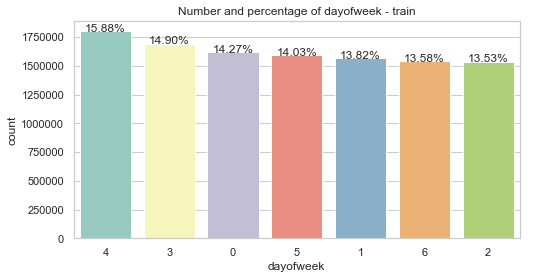

In [51]:
plot_count('dayofweek', 'dayofweek - train', train_df, size=2)

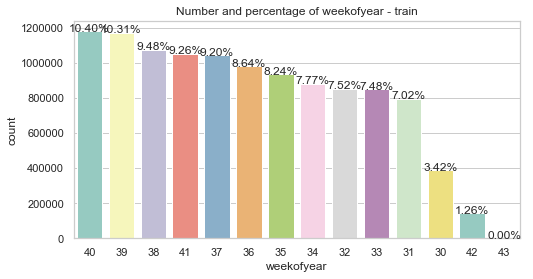

In [52]:
plot_count('weekofyear', 'weekofyear - train', train_df, size=2)

In [53]:
numerical_columns = ['game_time', 'month', 'dayofweek', 'hour']
categorical_columns = ['type', 'world']

comp_train_df = pd.DataFrame({'installation_id': train_df['installation_id'].unique()})
comp_train_df.set_index('installation_id', inplace = True)

In [55]:
def get_numeric_columns(df, column):
    df = df.groupby('installation_id').agg({f'{column}': ['mean', 'sum', 'min', 'max', 'std', 'skew']})
    df[column].fillna(df[column].mean(), inplace = True)
    df.columns = [f'{column}_mean', f'{column}_sum', f'{column}_min', f'{column}_max', f'{column}_std', f'{column}_skew']
    return df

In [56]:
for i in numerical_columns:
    comp_train_df = comp_train_df.merge(get_numeric_columns(train_df, i), left_index = True, right_index = True)

/Users/s.imazeki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [ ]:
# get the mode of the title
labels_map = dict(train_labels_df.groupby('title')['accuracy_group'].agg(lambda x:x.value_counts().index[0]))
# merge target
labels = train_labels_df[['installation_id', 'title', 'accuracy_group']]
# replace title with the mode
labels['title'] = labels['title'].map(labels_map)
# join train with labels
comp_train_df = labels.merge(comp_train_df, on = 'installation_id', how = 'left')
print('We have {} training rows'.format(comp_train_df.shape[0]))

comp_train_df.head()

/Users/s.imazeki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
plot_count('title', 'title - compound train', comp_train_df)

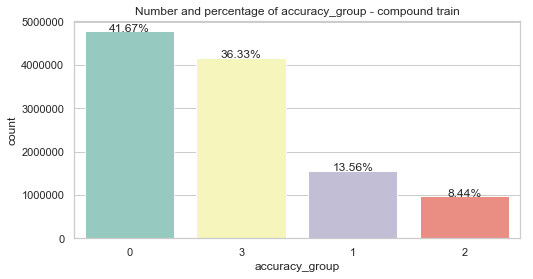

In [69]:
plot_count('accuracy_group', 'accuracy_group - compound train', comp_train_df, size=2)

/Users/s.imazeki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


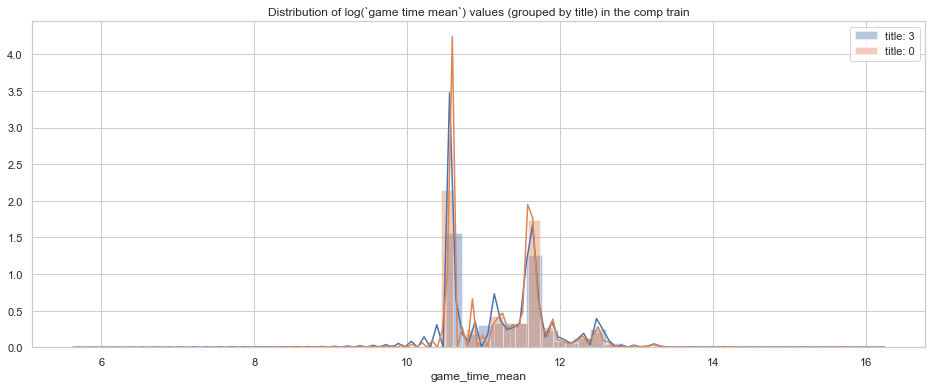

In [95]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of log(`game time mean`) values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(np.log(red_comp_train_df['game_time_mean']), kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

/Users/s.imazeki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


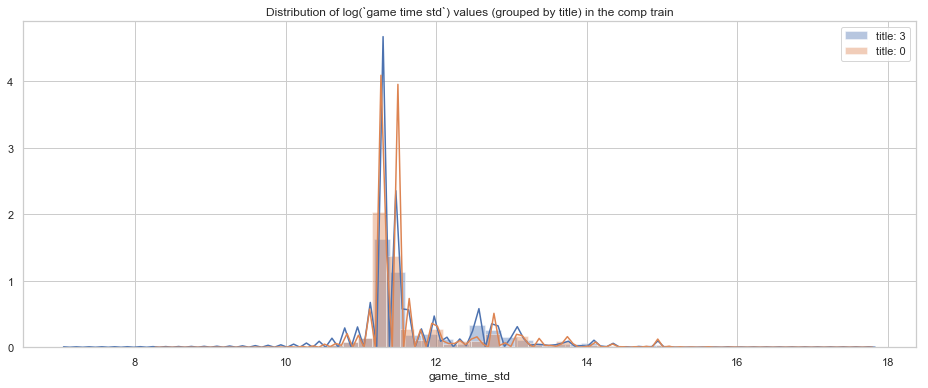

In [71]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of log(`game time std`) values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(np.log(red_comp_train_df['game_time_std']), kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

/Users/s.imazeki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


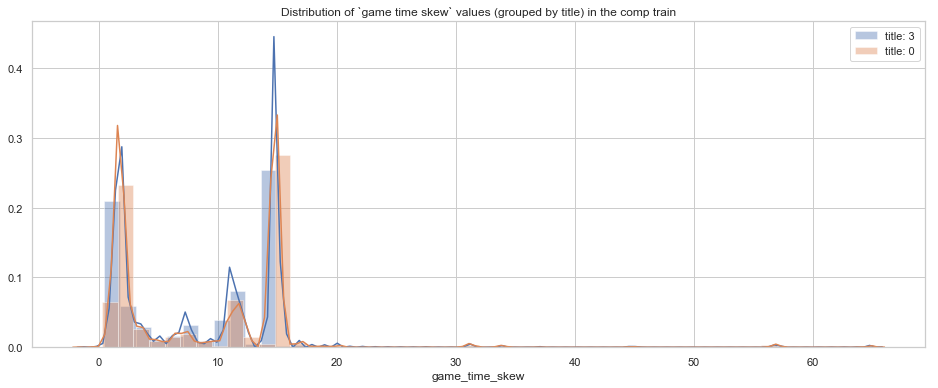

In [72]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of `game time skew` values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(red_comp_train_df['game_time_skew'], kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

/Users/s.imazeki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


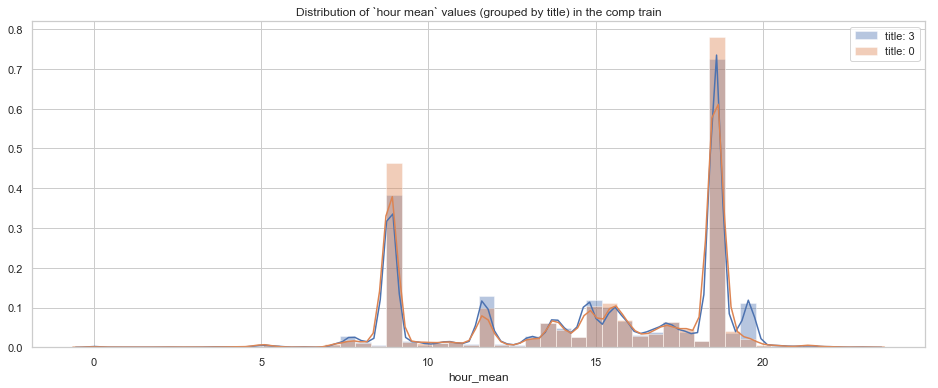

In [73]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of `hour mean` values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(red_comp_train_df['hour_mean'], kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

/Users/s.imazeki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


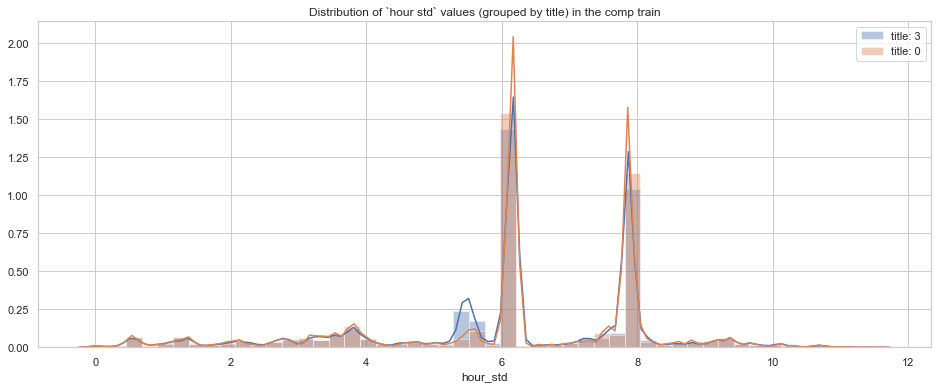

In [74]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of `hour std` values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(red_comp_train_df['hour_std'], kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

/Users/s.imazeki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


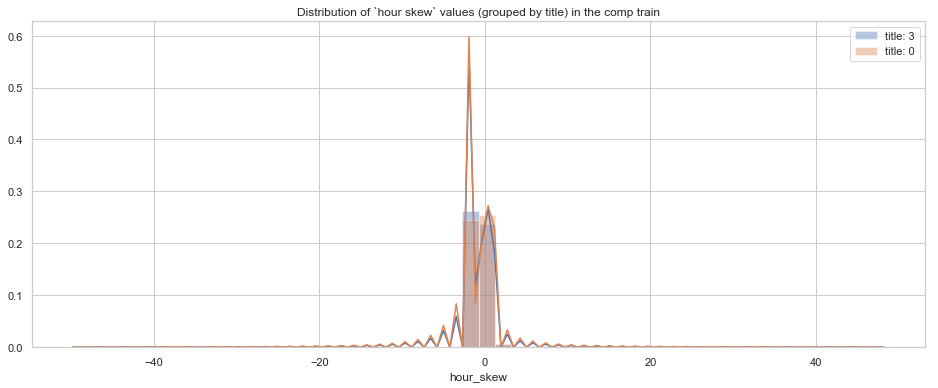

In [75]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of `hour skew` values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(red_comp_train_df['hour_skew'], kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

/Users/s.imazeki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


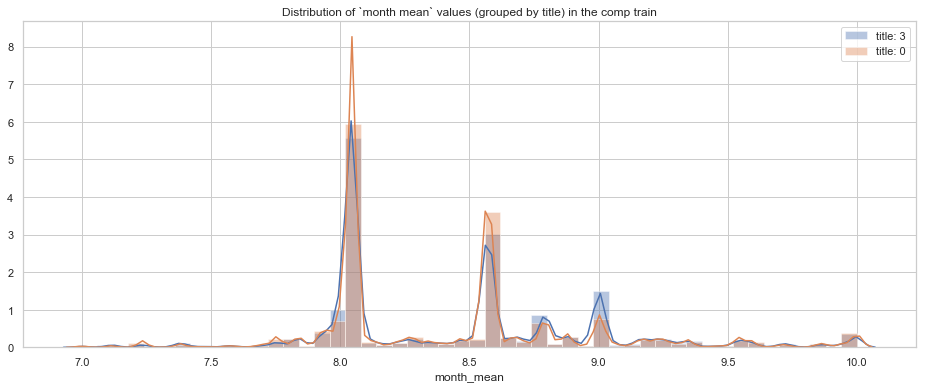

In [76]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of `month mean` values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(red_comp_train_df['month_mean'], kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

/Users/s.imazeki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


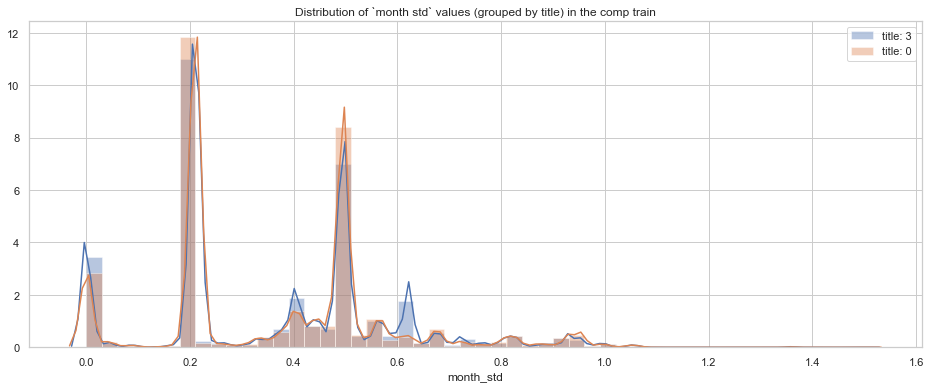

In [77]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of `month std` values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(red_comp_train_df['month_std'], kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

/Users/s.imazeki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


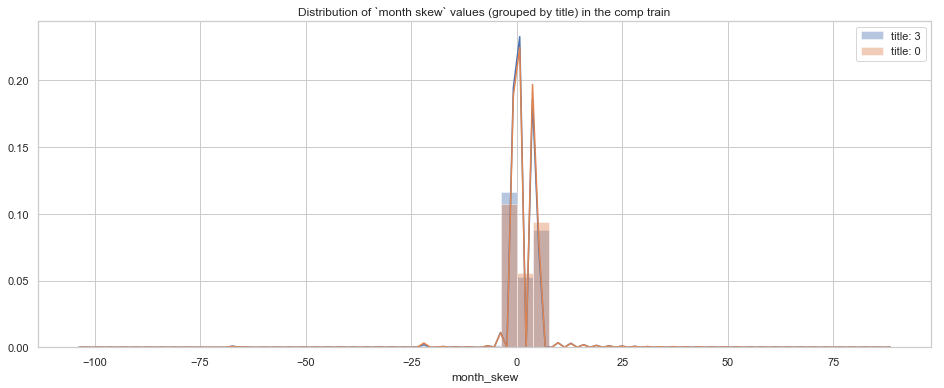

In [78]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of `month skew` values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(red_comp_train_df['month_skew'], kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

/Users/s.imazeki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


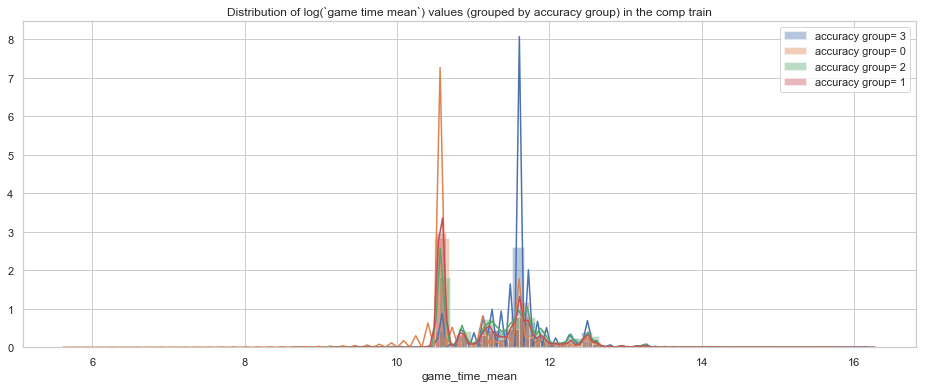

In [79]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of log(`game time mean`) values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(np.log(red_comp_train_df['game_time_mean']), kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

/Users/s.imazeki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


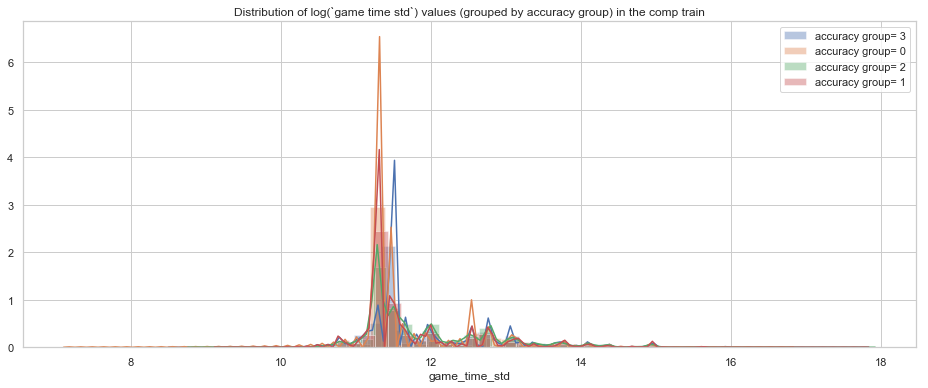

In [80]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of log(`game time std`) values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(np.log(red_comp_train_df['game_time_std']), kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

/Users/s.imazeki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


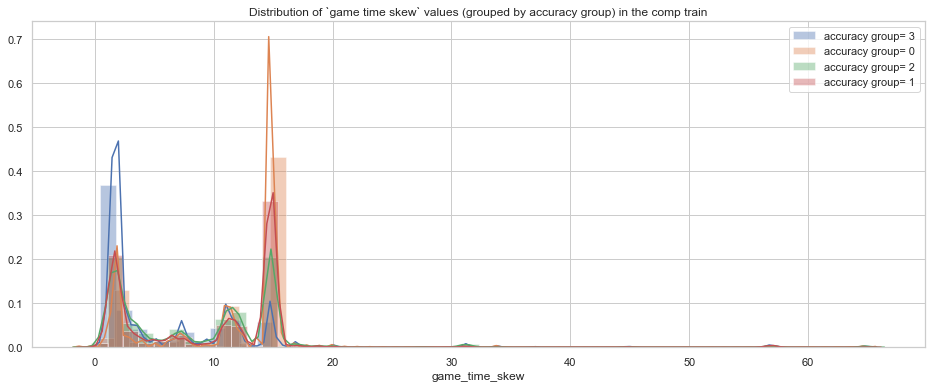

In [81]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of `game time skew` values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(red_comp_train_df['game_time_skew'], kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

/Users/s.imazeki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


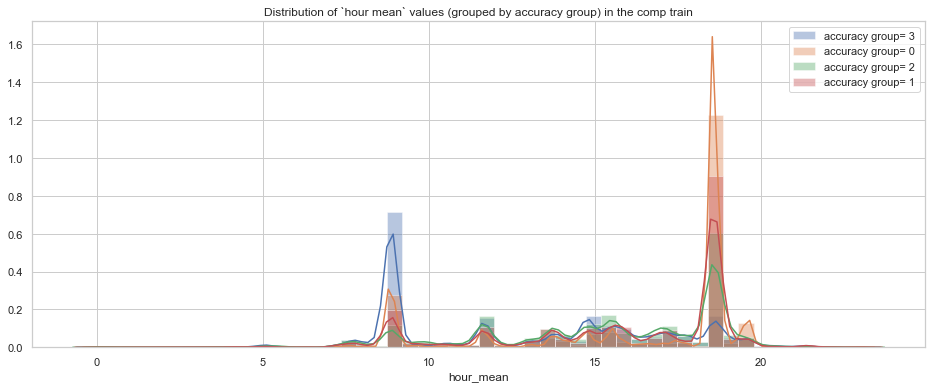

In [82]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of `hour mean` values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(red_comp_train_df['hour_mean'], kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

/Users/s.imazeki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


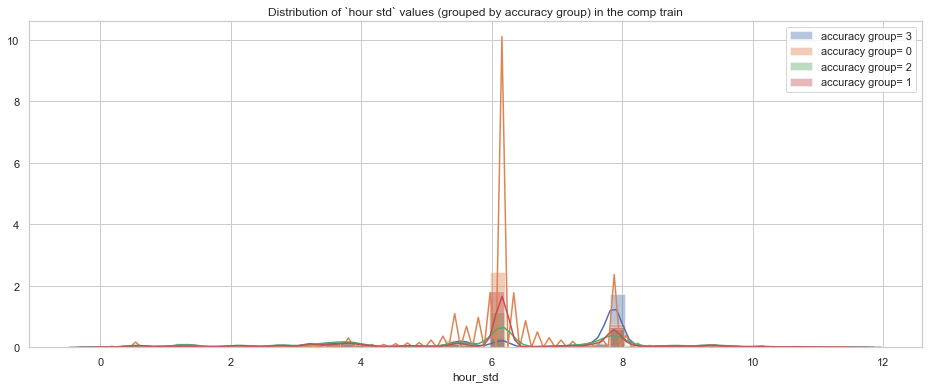

In [83]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of `hour std` values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(red_comp_train_df['hour_std'], kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

/Users/s.imazeki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


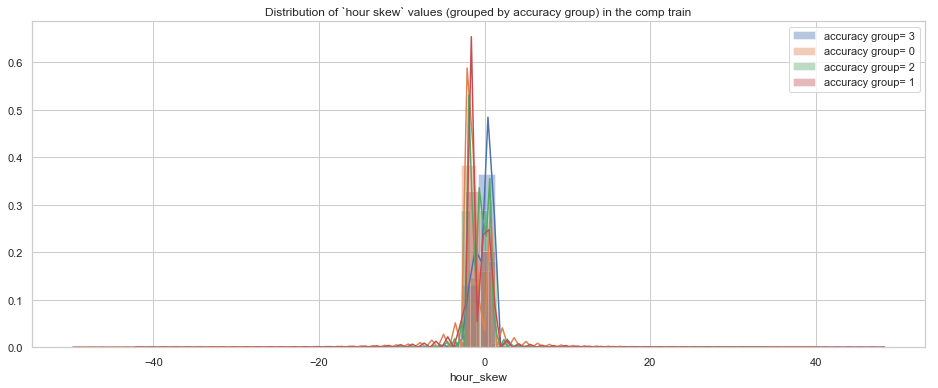

In [84]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of `hour skew` values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(red_comp_train_df['hour_skew'], kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

/Users/s.imazeki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


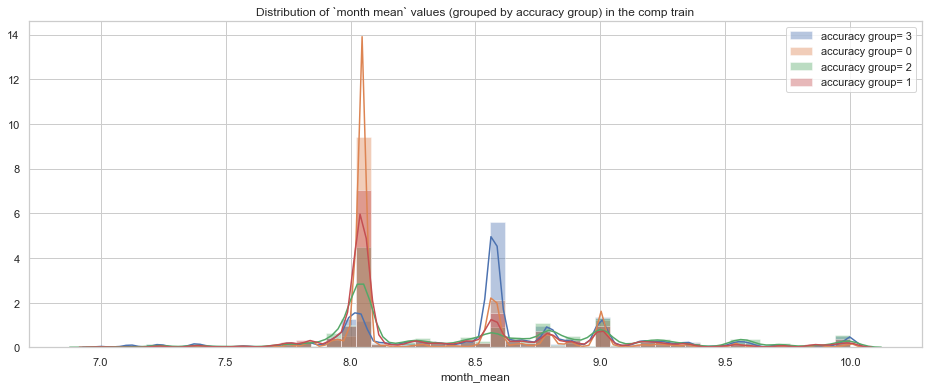

In [85]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of `month mean` values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(red_comp_train_df['month_mean'], kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

/Users/s.imazeki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


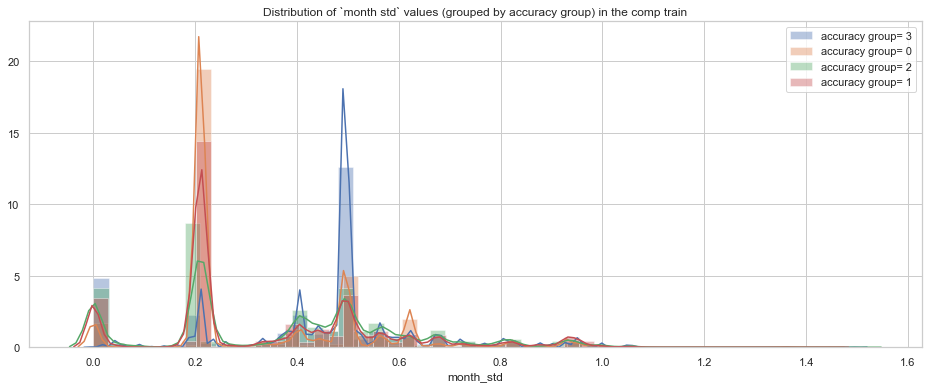

In [86]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of `month std` values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(red_comp_train_df['month_std'], kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

/Users/s.imazeki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


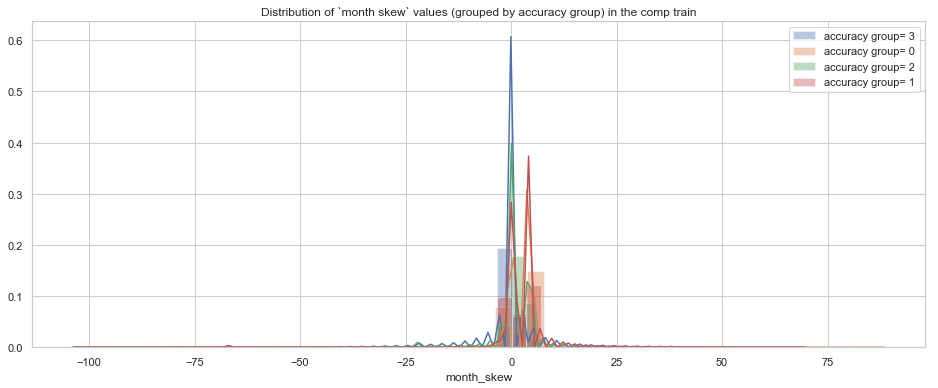

In [87]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of `month skew` values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(red_comp_train_df['month_skew'], kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()